In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Salary.csv')

# DATA PREPROCESSING

In [3]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [4]:
## Data Understanding
# dataset statistics.
X = df.drop(columns=['Salary'])
y = df['Salary'].values.reshape(-1, 1)
print("X shapes: ", X.shape)
print("y shapes: ", y.shape)
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

X shapes:  (6684, 8)
y shapes:  (6684, 1)
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (tot

In [5]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                   809
Data Scientist                      515
Data Analyst                        391
Software Engineer Manager           376
Product Manager                     323
                                   ... 
Director of Human Capital             1
Advertising Coordinator               1
Account Executive                     1
Director of Business Development      1
Social Media Man                      1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [6]:
# broaden categories
categories = {
    # technology
    'Software Engineer': 'Technology',
    'Data Analyst': 'Technology',
    'Web Developer': 'Technology',
    'Software Manager': 'Technology',
    'Data Engineer': 'Technology',
    'Full Stack Engineer': 'Technology',
    'Software Architect': 'Technology',
    'Software Developer': 'Technology',
    'Software Engineer Manager': 'Technology',
    'Front End Developer': 'Technology',
    'Front end Developer': 'Technology',
    'Back end Developer': 'Technology',
    'Network Engineer': 'Technology',
    'Developer': 'Technology',
    'Director of Engineering': 'Technology',
    'Engineer': 'Technology',
    'Project Engineer': 'Technology',
    'Principal Engineer': 'Technology',
    'Software Project Manager': 'Technology',

    # business
    'Sales Associate': 'Business',
    'Marketing Analyst': 'Business',
    'Marketing Coordinator': 'Business',
    'Financial Analyst': 'Business',
    'Marketing Manager': 'Business',
    'Sales Director': 'Business',
    'Business Analyst': 'Business',
    'Financial Manager': 'Business',
    'Consultant': 'Business',
    'Account Manager': 'Business',
    'Account Executive': 'Business',
    'Customer Success Manager': 'Business',
    'Business Development Manager': 'Business',
    'Business Operations Analyst': 'Business',
    'Strategy Consultant': 'Business',
    'Accountant': 'Business',
    'Business Development Associate': 'Business',
    'Business Intelligence Analyst': 'Business',
    'Content Marketing Manager': 'Business',
    'Digital Marketing Manager': 'Business',
    'Digital Marketing Specialist': 'Business',
    'Director of Business Development': 'Business',
    'Director of Finance': 'Business',
    'Director of Marketing': 'Business',
    'Director of Product Management': 'Business',
    'Director of Sales': 'Business',
    'Director of Sales and Marketing': 'Business',
    'Financial Advisor': 'Business',
    'Marketing Director': 'Business',
    'Marketing Specialist': 'Business',
    'Product Marketing Manager': 'Business',
    'Quality Assurance Analyst': 'Business',
    'Sales Associate': 'Business',
    'Sales Executive': 'Business',
    'Sales Manager': 'Business',
    'Sales Operations Manager': 'Business',
    'Sales Representative': 'Business',
    'Supply Chain Analyst': 'Business',
    'Supply Chain Manager': 'Business',
    'VP of Finance': 'Business',
    'Product Development Manager': 'Business',

    # human resources
    'HR Manager': 'Human Resources',
    'Customer Service Rep': 'Human Resources',
    'Recruiter': 'Human Resources',
    'HR Generalist': 'Human Resources',
    'HR Coordinator': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'HR Specialist': 'Human Resources',
    'Technical Recruiter': 'Human Resources',
    'Administrative Assistant': 'Human Resources',
    'Advertising Coordinator': 'Human Resources',
    'Copywriter': 'Human Resources',
    'Customer Service Manager': 'Human Resources',
    'Customer Service Representative': 'Human Resources',
    'Customer Success Rep': 'Human Resources',
    'Customer Support Specialist': 'Human Resources',
    'Director': 'Human Resources',
    'Director of HR': 'Human Resources',
    'Director of Human Capital': 'Human Resources',
    'Director of Human Resources': 'Human Resources',
    'Director of Operations': 'Human Resources',
    'Event Coordinator': 'Human Resources',
    'Human Resources Coordinator': 'Human Resources',
    'Juniour HR Coordinator': 'Human Resources',
    'Juniour HR Generalist': 'Human Resources',
    'Public Relations Manager': 'Human Resources',
    'Human Resources Specialist': 'Human Resources',
    'Human Resources Director': 'Human Resources',

    # information technology
    'IT Support Specialist': 'Information Technology',
    'Help Desk Analyst': 'Information Technology',
    'IT Project Manager': 'Information Technology',
    'IT Support': 'Information Technology',
    'IT Manager': 'Information Technology',
    'Chief Data Officer': 'Information Technology',
    'Chief Technology Officer': 'Information Technology',
    'IT Consultant': 'Information Technology',
    'Technical Support Specialist': 'Information Technology',

    # social media
    'Social Media Specialist': 'Social Media',
    'Social Media Manager': 'Social Media',
    'Social Media Man': 'Social Media',

    # design
    'Graphic Designer': 'Design',
    'UX Designer': 'Design',
    'Creative Director': 'Design',
    'Digital Content Producer': 'Design',
    'Designer': 'Design',
    'Web Designer': 'Design',
    'Product Designer': 'Design',
    'UX Researcher': 'Design',

    # research and science
    'Data Scientist': 'Research and Science',
    'Research Scientist': 'Research and Science',
    'Principal Scientist': 'Research and Science',
    'Researcher': 'Research and Science',
    'Director of Data Science': 'Research and Science',
    'Research Director': 'Research and Science',
    'Scientist': 'Research and Science',


    # miscellaneous
    'Manager': 'Miscellaneous',
    'Product Manager': 'Miscellaneous',
    'Project Manager': 'Miscellaneous',
    'Operations Manager': 'Miscellaneous',
    'Data Entry Clerk': 'Miscellaneous',
    'VP of Operations': 'Miscellaneous',
    'Operations Director': 'Miscellaneous',
    'CEO': 'Miscellaneous',
    'Delivery Driver': 'Miscellaneous',
    'Office Manager': 'Miscellaneous',
    'Operations Analyst': 'Miscellaneous',
    'Operations Coordinator': 'Miscellaneous',
    'Project Coordinator': 'Miscellaneous',
    'Receptionist': 'Miscellaneous',
    'Technical Writer': 'Miscellaneous',
    'Training Specialist': 'Miscellaneous',

}


# print(df['Job Title'].unique())

for category in categories:
    for i in range(len(df['Job Title'])):
        if category == df['Job Title'][i]:
            df.loc[i, 'Job Title'] = categories[category]

# print(df['Job Title'].unique())

# ONE HOT ENCODING FOR EACH DATASET

In [7]:
# eliminating columns with strings and the column with the target variable
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# eliminate rows with NaN
df = df.dropna()

# SPLIT DEPENDENT AND INDEPENDENT VARIABLES

In [8]:
# this ensures salary is not modified during feature selection
X = df.drop(columns=['Salary'])
y = df['Salary']

# EXPLORATORY DATA ANALYSIS

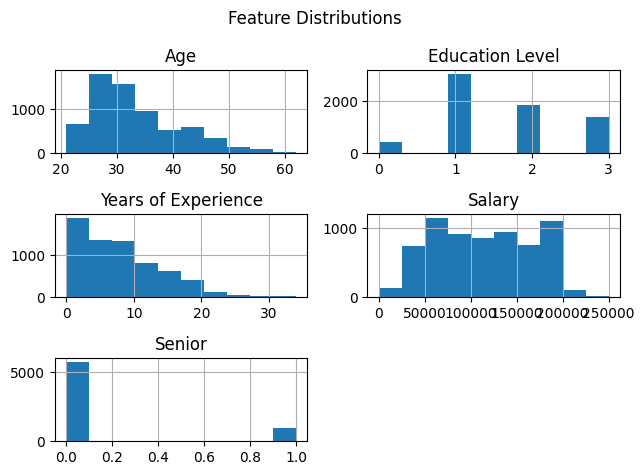

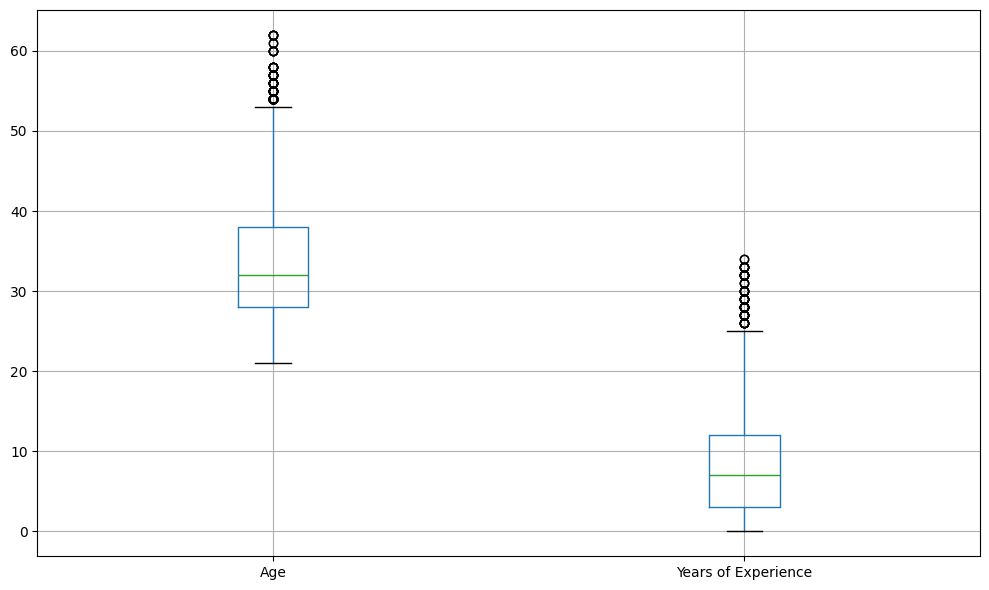

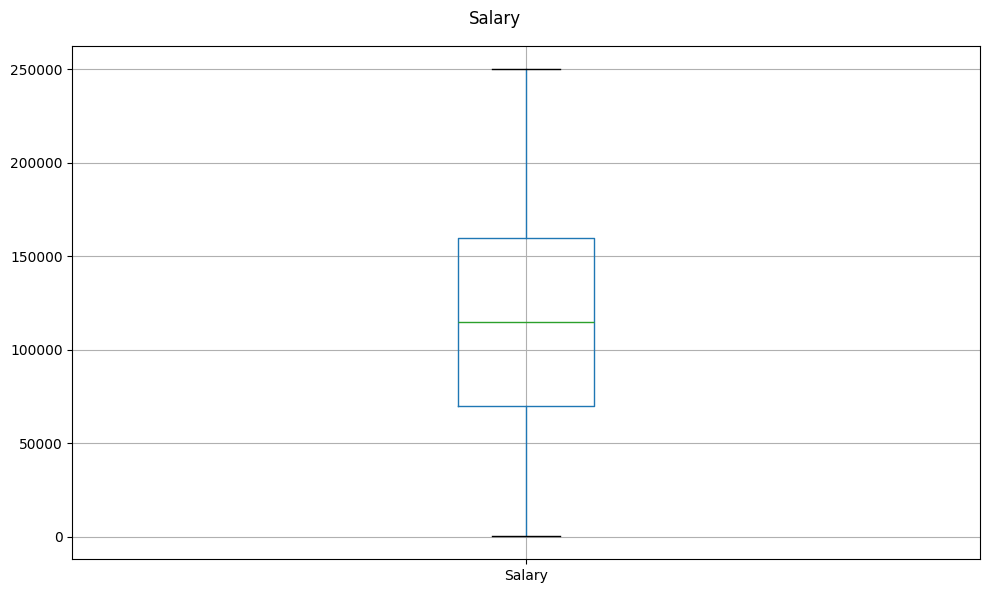

Component Age's lower outliers:
(119,)
Component Years of Experience's lower outliers:
(69,)


In [9]:
# histogram distribution
df.hist()
plt.suptitle(f"Feature Distributions")
plt.tight_layout()
plt.show()

# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.suptitle(f"Salary")
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df_encoded[feature].quantile(0.25)
    q3 = df_encoded[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df_encoded[feature] < lower_bound
    outliers_upper = df_encoded[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"Component {feature}'s lower outliers:\n{df_encoded.loc[outliers_upper, feature].shape}")
    if outliers_lower.any():
        print(f"Component {feature}'s lower outliers:\n{df_encoded.loc[outliers_lower, feature].shape}")

    df_encoded.loc[outliers_lower, feature] = lower_bound
    df_encoded.loc[outliers_upper, feature] = upper_bound

# FEATURE SELECTION

first principal component analysis: 
Australia
variance ratios: [1.86409898e-01 1.56158048e-01 1.14343172e-01 9.64426901e-02
 8.96549190e-02 7.73724862e-02 7.15419897e-02 6.89330543e-02
 5.92814246e-02 4.37226315e-02 3.17577277e-02 4.38195862e-03
 4.71061517e-18 6.65594242e-33 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
number of remaining components: 18
total variance ratio: 1.0000000000000002



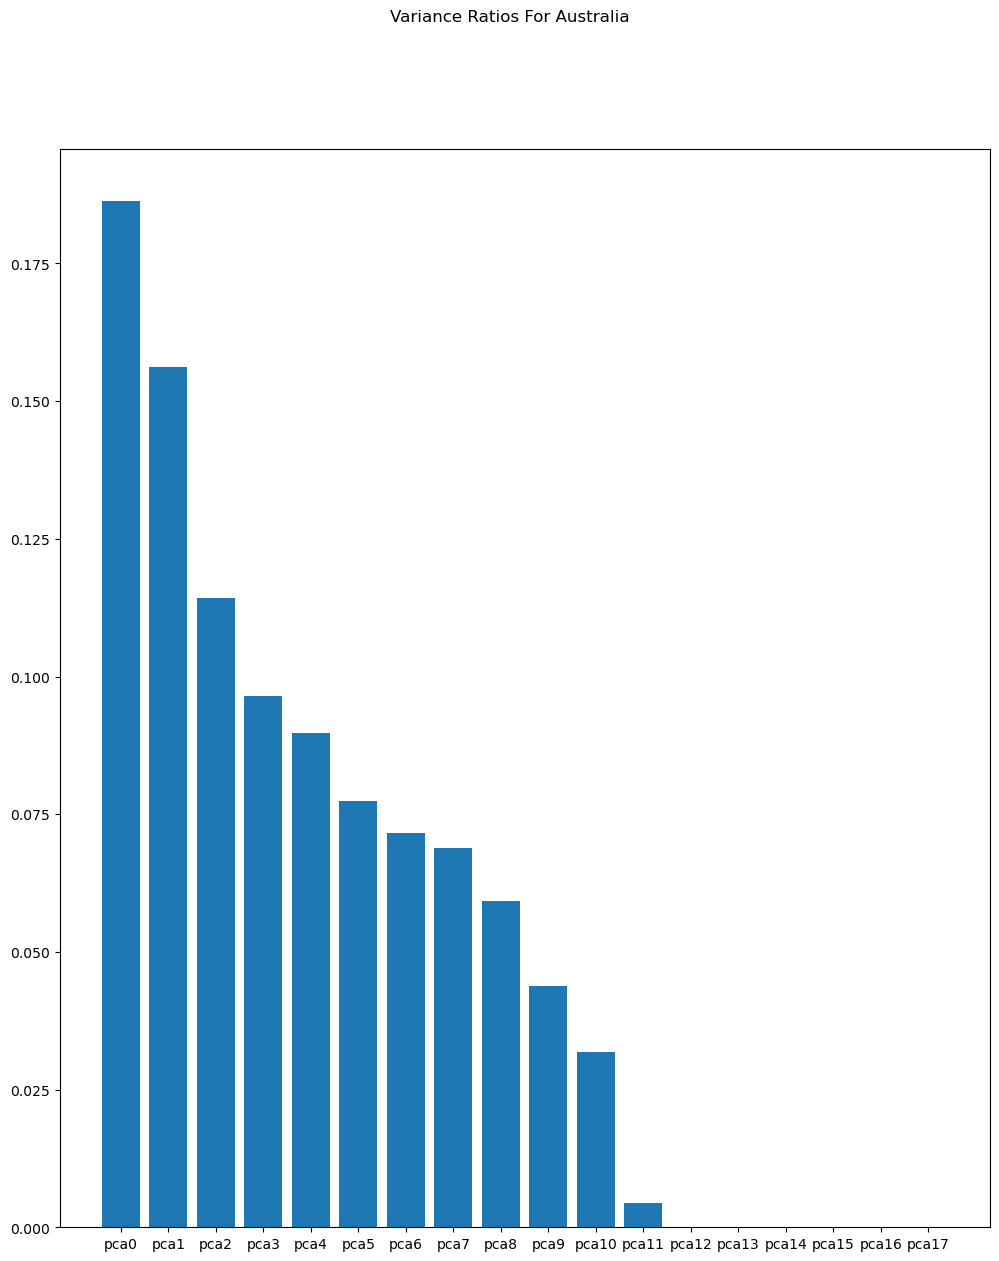

Canada
variance ratios: [1.67902837e-01 1.38969072e-01 1.00303647e-01 9.53864707e-02
 9.06450059e-02 7.44208964e-02 6.64845122e-02 6.43789980e-02
 6.22700220e-02 5.71906469e-02 4.61265091e-02 3.16082201e-02
 4.31316226e-03 4.92790931e-18 3.20627035e-33 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
number of remaining components: 18
total variance ratio: 1.0



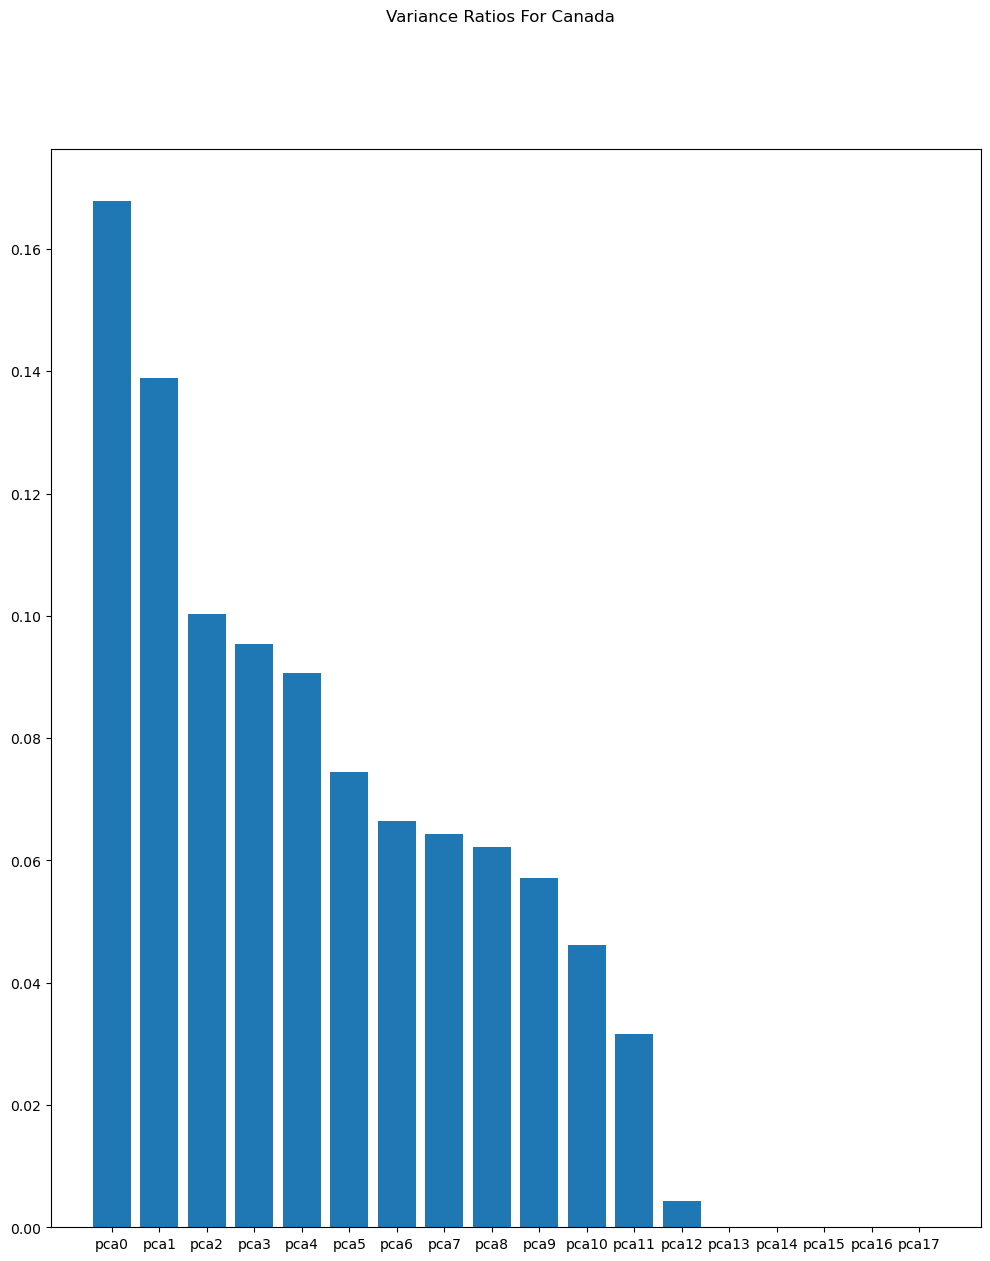

China
variance ratios: [1.62658169e-01 1.45568220e-01 1.02360238e-01 9.56149284e-02
 9.04015731e-02 7.45434815e-02 6.72348380e-02 6.55501634e-02
 6.06480116e-02 5.25346409e-02 4.51688069e-02 3.35466881e-02
 4.17024104e-03 2.17690437e-17 1.48141200e-33 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
number of remaining components: 18
total variance ratio: 0.9999999999999998



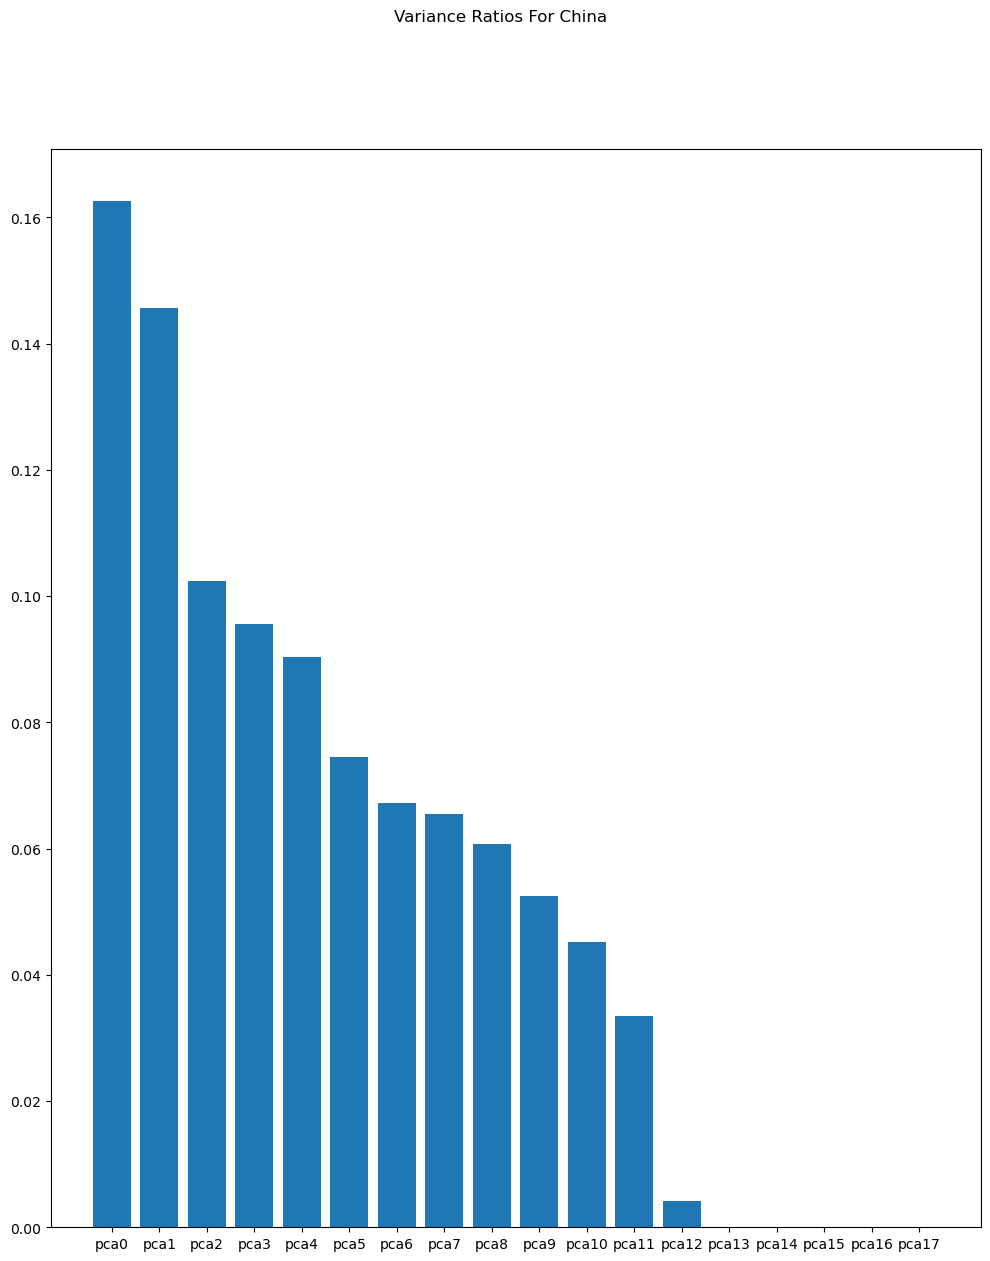

UK
variance ratios: [1.55422847e-01 1.35049255e-01 9.40776124e-02 8.46038733e-02
 7.75508549e-02 7.04523149e-02 6.82760385e-02 6.43937244e-02
 5.93449012e-02 5.66059270e-02 5.38968730e-02 4.15167455e-02
 3.38750301e-02 4.93400299e-03 1.45527523e-17 1.93292747e-30
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
number of remaining components: 19
total variance ratio: 1.0000000000000002



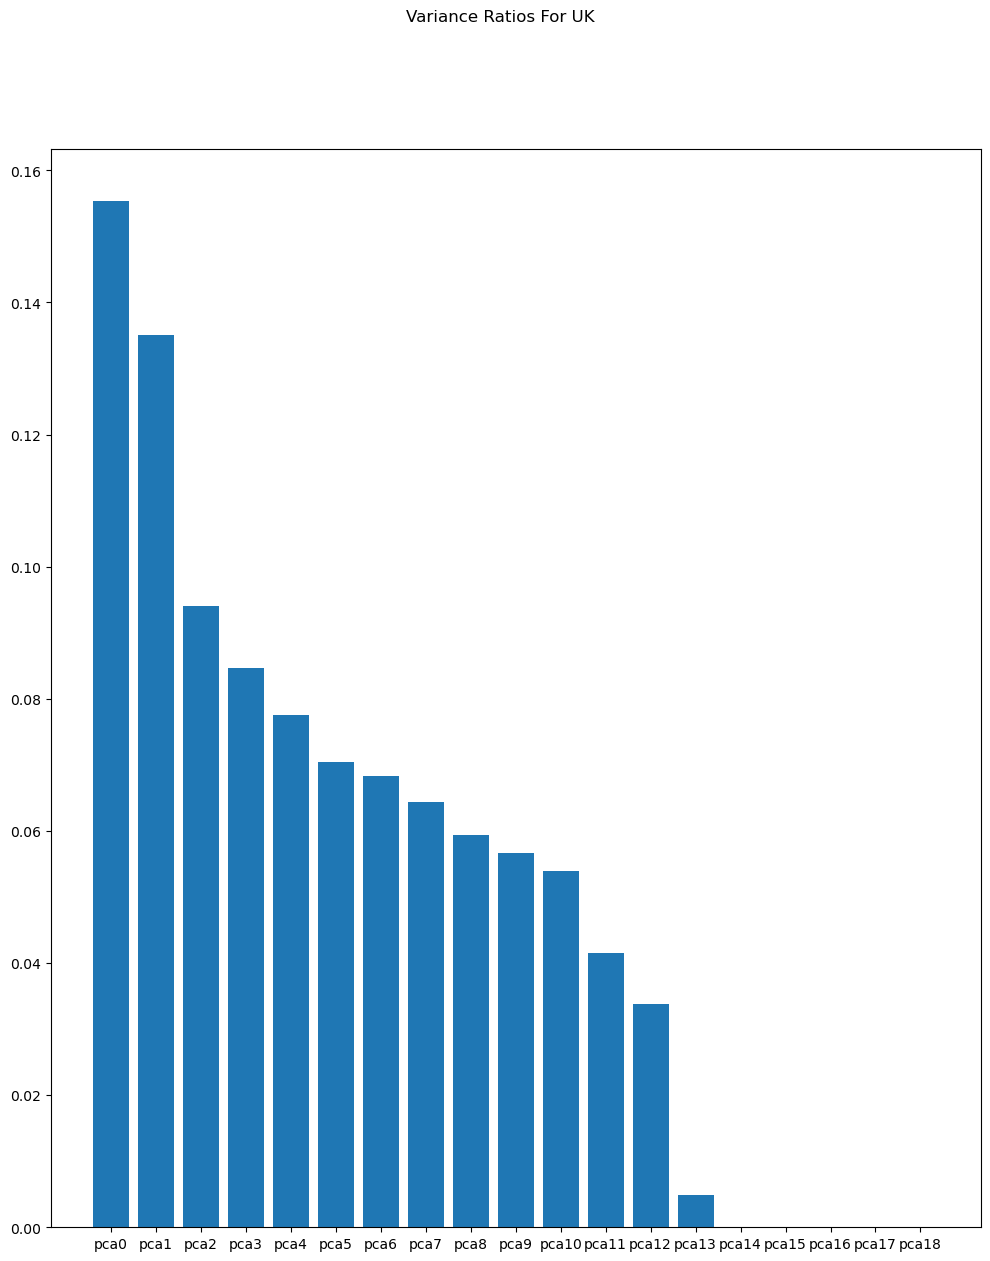

USA
variance ratios: [1.48630709e-01 1.29669064e-01 1.00328861e-01 9.24934262e-02
 8.27915974e-02 7.13979550e-02 6.68593153e-02 6.22644310e-02
 5.89459417e-02 5.63652128e-02 5.21925343e-02 4.18346097e-02
 3.21884989e-02 4.03784314e-03 2.85697171e-17 3.62247456e-18
 3.05461104e-31 0.00000000e+00 0.00000000e+00]
number of remaining components: 19
total variance ratio: 1.0000000000000002



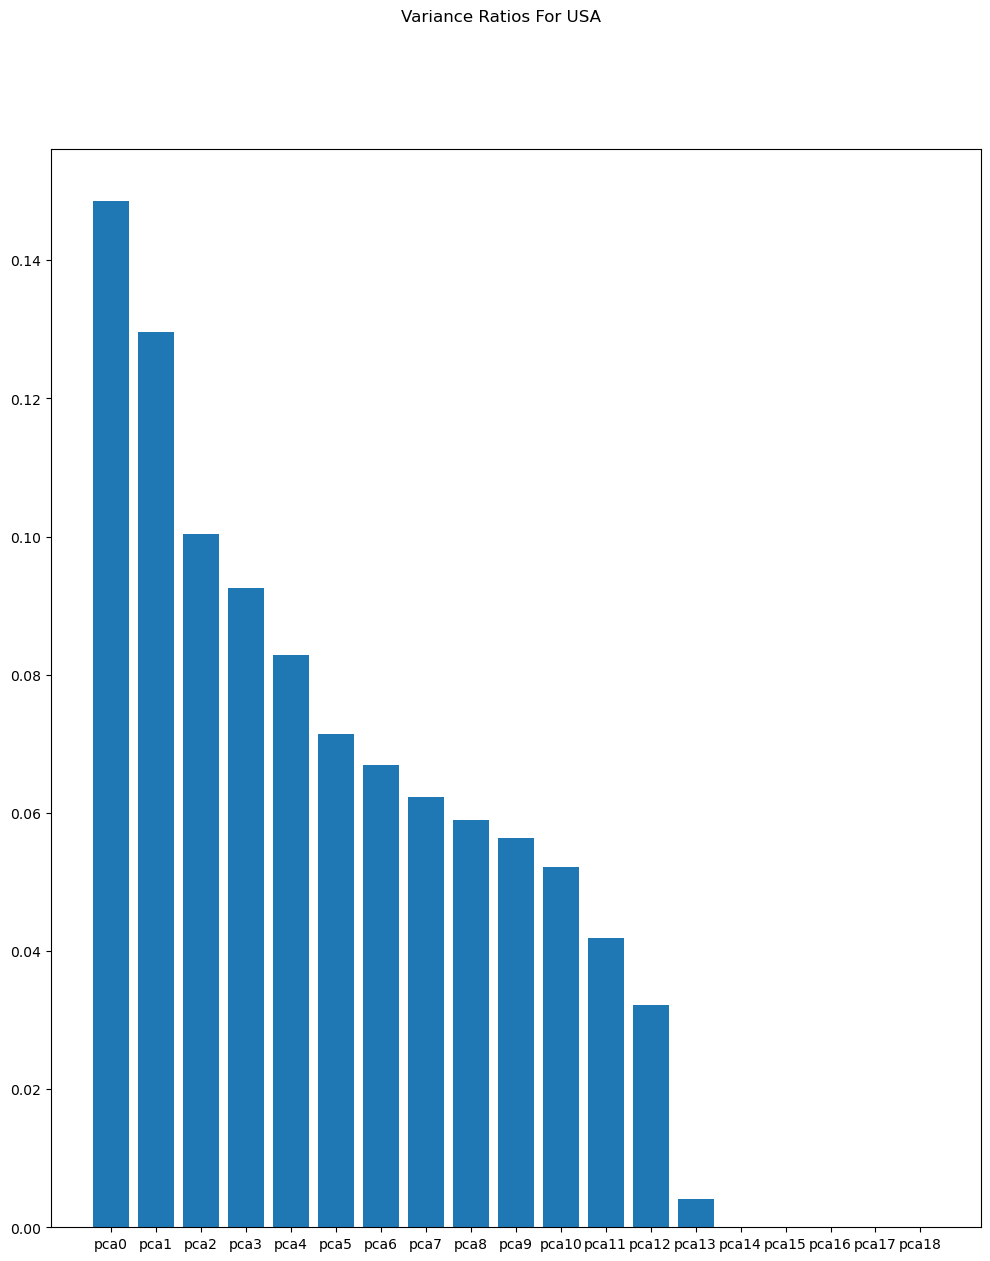



second principal component analysis: 
Australia
variance ratios: [0.1864099  0.15615805 0.11434317 0.09644269 0.08965492 0.07737249
 0.07154199 0.06893305 0.05928142 0.04372263 0.03175773 0.00438196]
number of remaining components: 12
total variance ratio: 0.9999999999999999



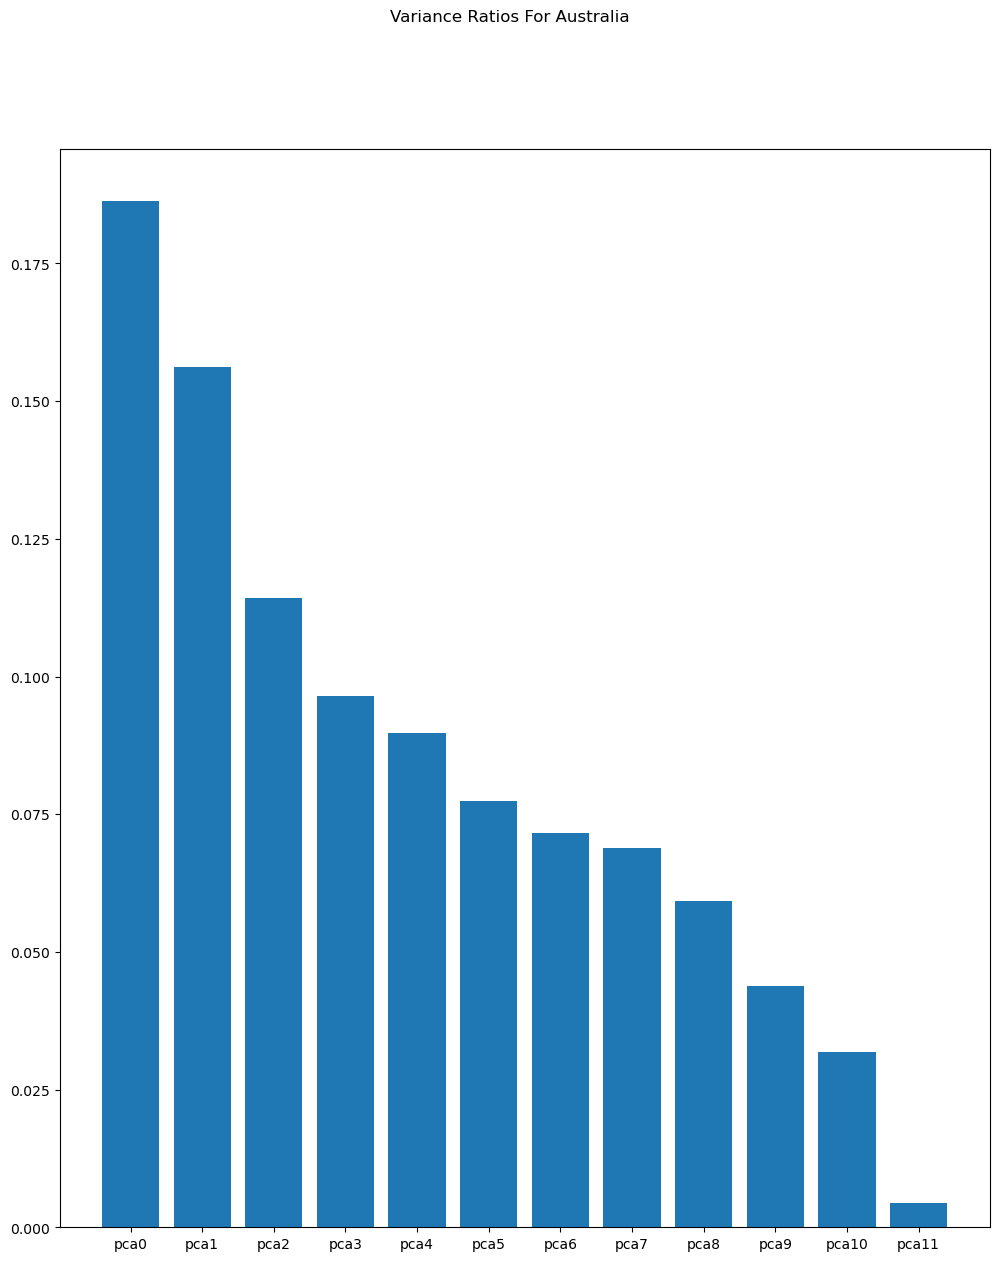

Canada
variance ratios: [0.16790284 0.13896907 0.10030365 0.09538647 0.09064501 0.0744209
 0.06648451 0.064379   0.06227002 0.05719065 0.04612651 0.03160822
 0.00431316]
number of remaining components: 13
total variance ratio: 0.9999999999999999



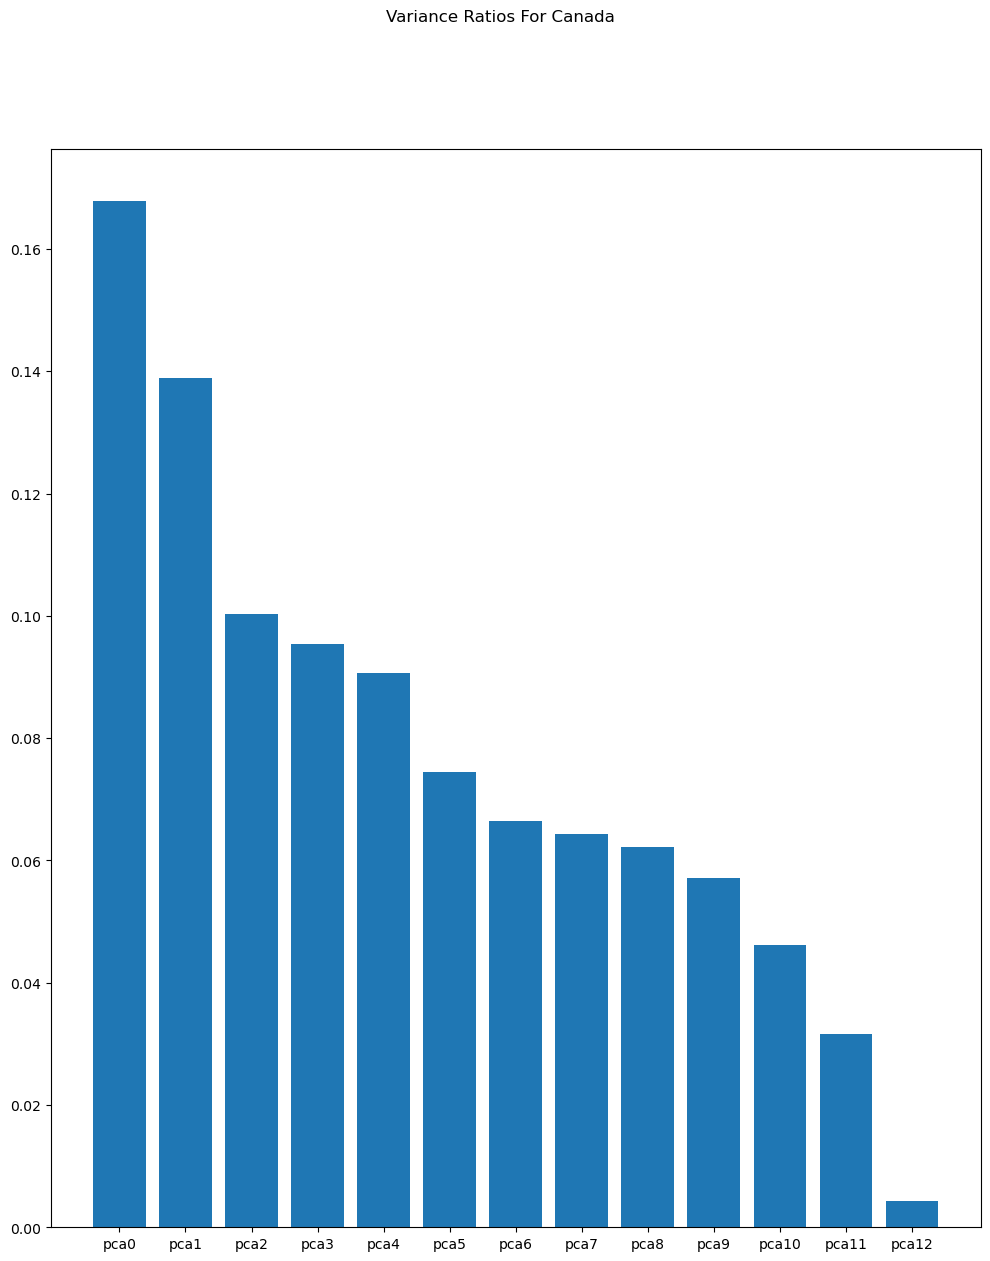

China
variance ratios: [0.16265817 0.14556822 0.10236024 0.09561493 0.09040157 0.07454348
 0.06723484 0.06555016 0.06064801 0.05253464 0.04516881 0.03354669
 0.00417024]
number of remaining components: 13
total variance ratio: 0.9999999999999998



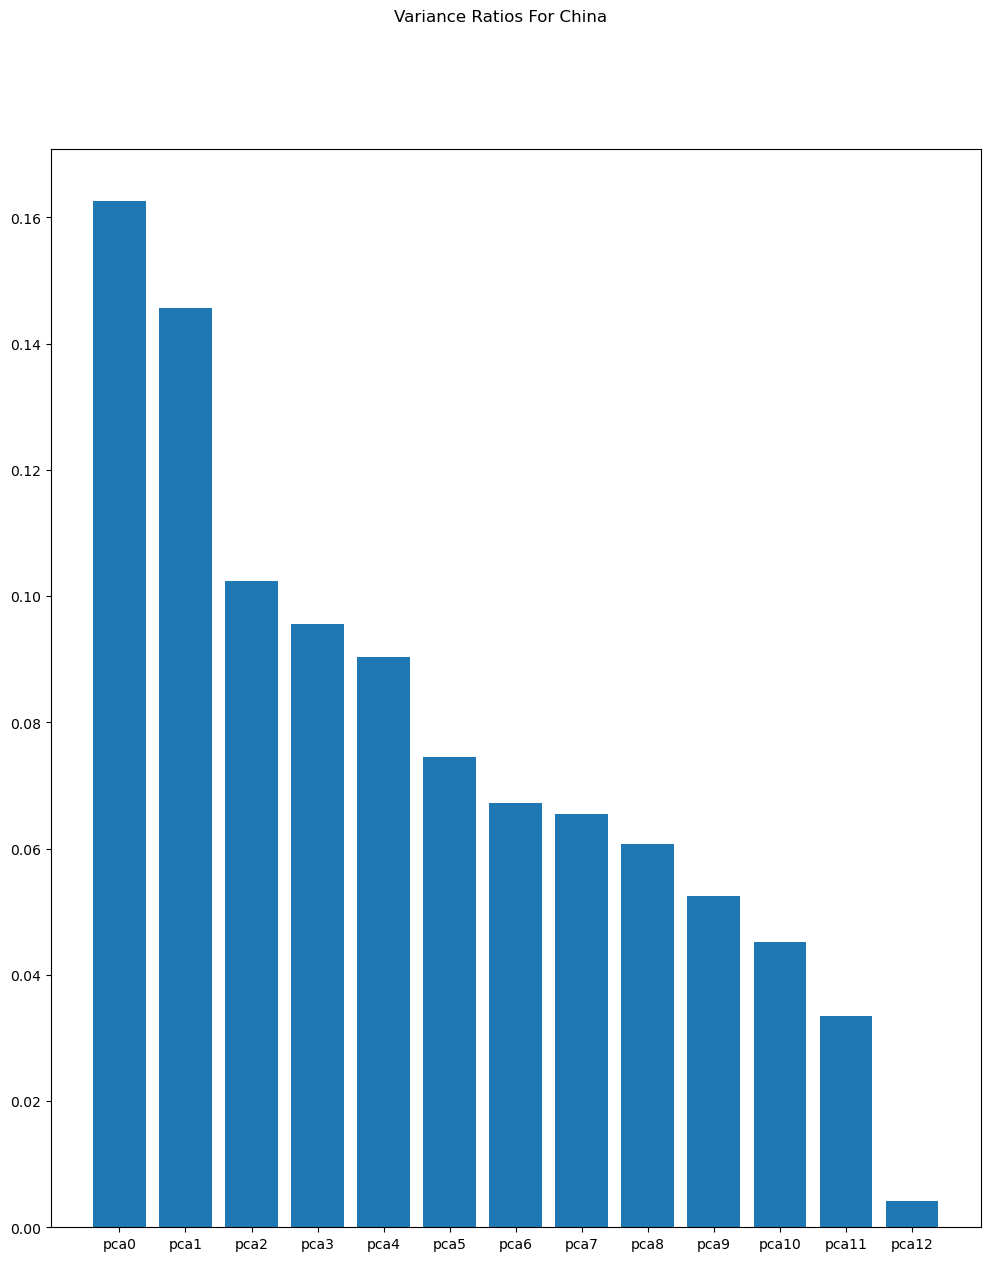

UK
variance ratios: [0.15542285 0.13504926 0.09407761 0.08460387 0.07755085 0.07045231
 0.06827604 0.06439372 0.0593449  0.05660593 0.05389687 0.04151675
 0.03387503 0.004934  ]
number of remaining components: 14
total variance ratio: 1.0



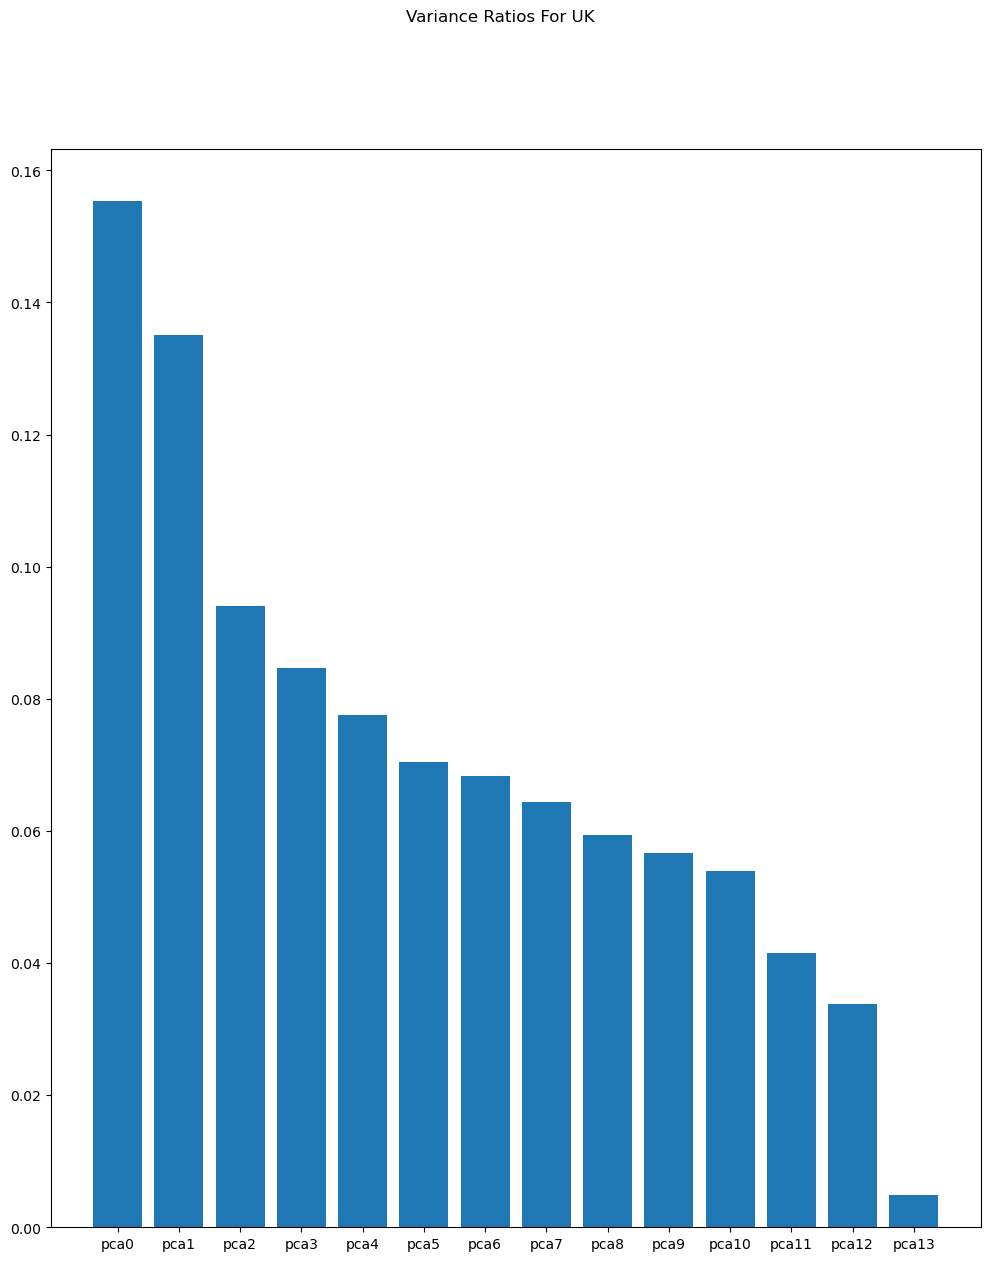

USA
variance ratios: [0.14863071 0.12966906 0.10032886 0.09249343 0.0827916  0.07139795
 0.06685932 0.06226443 0.05894594 0.05636521 0.05219253 0.04183461
 0.0321885  0.00403784]
number of remaining components: 14
total variance ratio: 0.9999999999999998



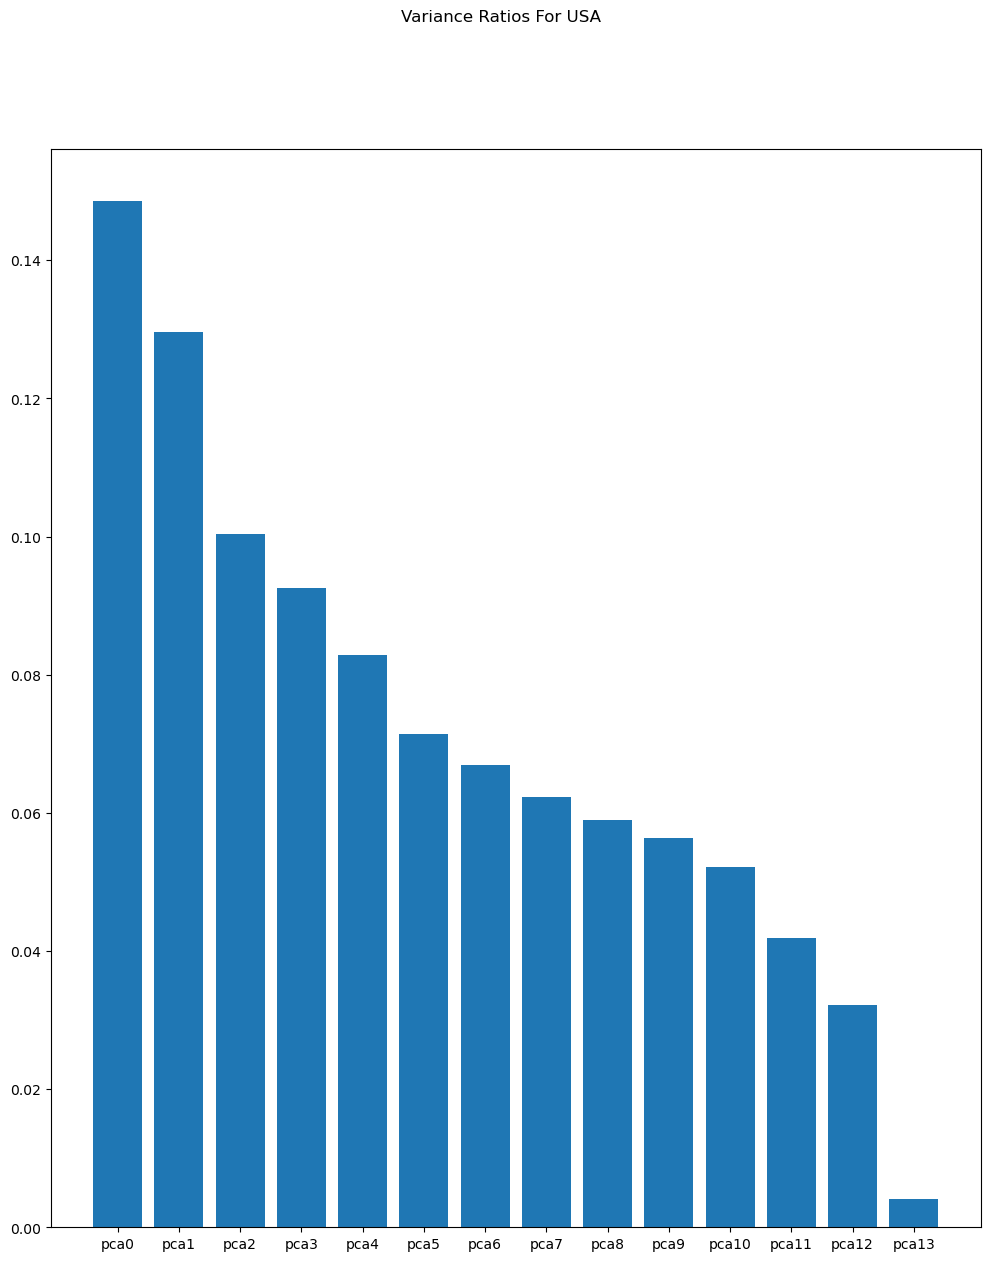

In [327]:
# scale each dataset
scaler = StandardScaler()
for country, group in country_data.items():
    # scale the dataset, keep salary the same
    country_data[country] = [scaler.fit_transform(group[0]), group[1]]

# principal component analysis
print("first principal component analysis: ")
for country, group in country_data.items():
    # initialize PCA
    pca = PCA()

    # perform pca on dataset, keep salary the same
    country_data[country] = [pca.fit_transform(group[0]), group[1]]

    # print results of pca
    print(country)
    print(f"variance ratios: {pca.explained_variance_ratio_}")
    print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")

    # check if the total variance ratio adds up to 1
    total_variance_ratio = 0.0
    for ratio in pca.explained_variance_ratio_:
        total_variance_ratio += ratio
    print(f"total variance ratio: {total_variance_ratio}")
    total_variance_ratio = 0.0
    print()

    # plot variance ratios
    plt.figure(figsize=(12, 14))
    plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
    plt.suptitle(f"Variance Ratios For {country}")
    plt.show()

# some variance ratios are still very close to zero, so manually drop those components

print()
print()
print("second principal component analysis: ")
n = 1
for country, group in country_data.items():
    # manually drop components
    if country == 'Australia':
        n = 12
    elif country == 'Canada' or country == 'China':
        n = 13
    elif country == 'UK' or country == 'USA':
        n = 14

    # initialize PCA
    pca = PCA(n_components=n)

    # perform pca on dataset, keep salary the same
    country_data[country] = [pca.fit_transform(group[0]), group[1]]

    # print results of pca
    print(country)
    print(f"variance ratios: {pca.explained_variance_ratio_}")
    print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")
    
    # check if the total variance ratio adds up to 1
    total_variance_ratio = 0.0
    for ratio in pca.explained_variance_ratio_:
        total_variance_ratio += ratio
    print(f"total variance ratio: {total_variance_ratio}")
    total_variance_ratio = 0.0
    print()

    # plot variance ratios
    plt.figure(figsize=(12, 14))
    plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
    plt.suptitle(f"Variance Ratios For {country}")
    plt.show()

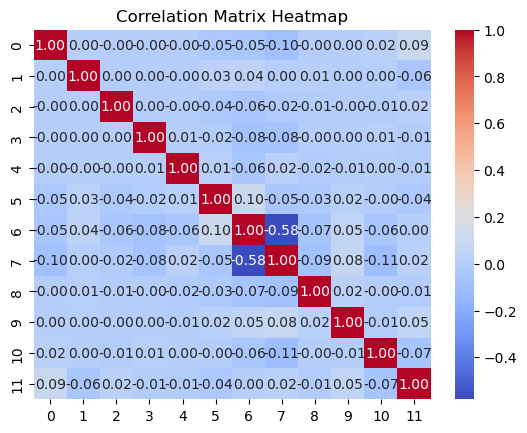

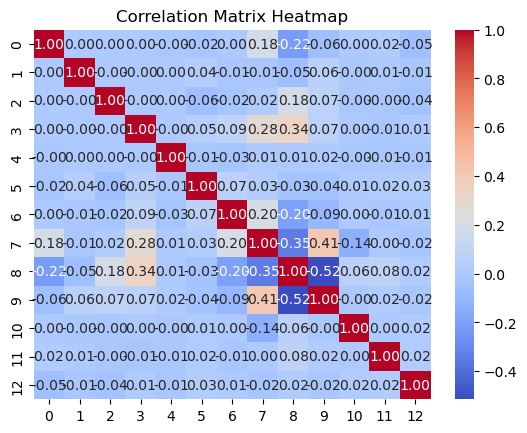

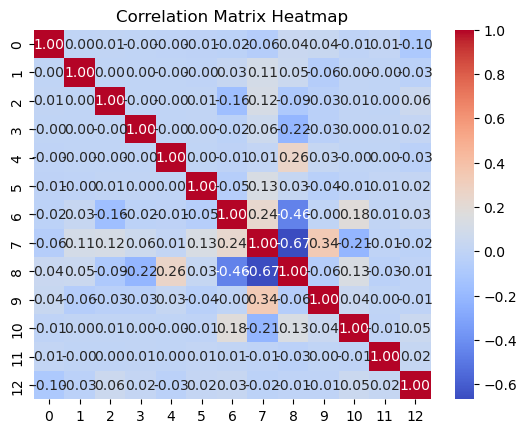

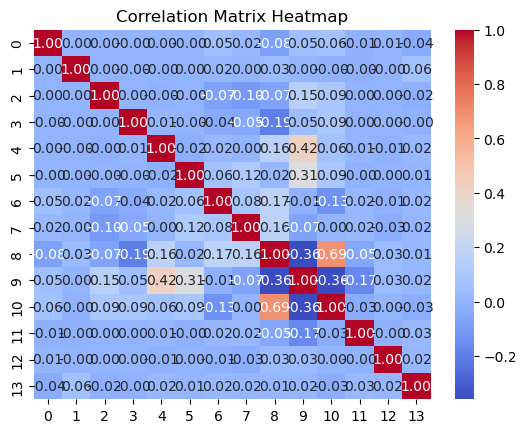

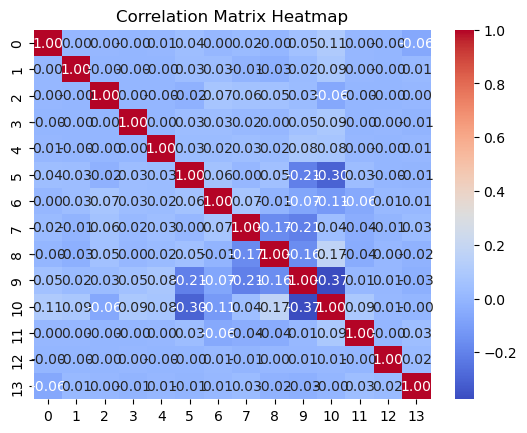

In [329]:
for country, group in country_data.items():
    # finding correlation

    # find correlation (use code from lab 0)
    correlation_matrix = np.corrcoef(group[0].T)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # feature selection
    # eliminate features that are highly correlated to reduce overfitting and improve the overall accuracy of the model

    # example: eliminate either age or years of experience because they have a correlation of 0.94
    # X = X.drop(columns=['Age'])
    # X = X.drop(columns=['Years of Experience'])

# LINEAR MODEL

In [330]:
for country, group in country_data.items():
    x_train, x_test, y_train, y_test = train_test_split(group[0], group[1], test_size=0.25, random_state=0)

    # data standardization
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # train model on training data.
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(country)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: ", mse)
    r2 = r2_score(y_test, y_pred)
    print("r2", r2)

    bias2 = np.mean((np.mean(y_pred) - y_test) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    print("Variance: ", variance, " Bias2: ", bias2)

Australia
MSE:  804854231.8419873
r2 0.6564192276159098
Variance:  1263388980.7690978  Bias2:  2342890005.4620934
Canada
MSE:  965768892.3910464
r2 0.4411381639396146
Variance:  1446911800.0994728  Bias2:  1728116457.0295684
China
MSE:  832506728.8136848
r2 0.6020008671511833
Variance:  1303547214.1127536  Bias2:  2111503368.3212712
UK
MSE:  979098003.1709654
r2 0.6049722294769386
Variance:  1316508530.1170397  Bias2:  2501454591.981376
USA
MSE:  1124798847.1066618
r2 0.5239634525485196
Variance:  1512429196.3314877  Bias2:  2382026307.953302


In [331]:
def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Split data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)

    # data standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate variance and bias for this fold
    variance = np.mean((np.mean(y_pred)-y_pred)**2)
    bias2 = np.mean((np.mean(y_pred)- y_test) ** 2)

    # Print results for this fold
    print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance, bias2, bias2 + variance))

    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse , r2

for country, group in country_data.items():
    degrees = range(1, 4)  # polynomial degrees from 1 to 5
    mse_list = []
    r2_list = []
    
    for i in degrees:
        mse, r2 = polynomial_regression(i, group[0], group[1], 5)
        mse_list.append(mse)
        r2_list.append(r2)

    for i in degrees:  # print mse
        print("Country: ", country, " Degree:", i, " MSE:", mse_list[i - 1], " r2: ", r2_list[i - 1])

Variance: 1263388980.7691, Bias2: 2342890005.4621, Total error: 3606278986.2312
Variance: 15910647795.3056, Bias2: 2818728765.7470, Total error: 18729376561.0526
Variance: 51753736176705378195952019439616.0000, Bias2: 775465704255716546111118245888.0000, Total error: 52529201880961095867963044528128.0000
Country:  Australia  Degree: 1  MSE: 804854231.8419863  r2:  0.6564192276159102
Country:  Australia  Degree: 2  MSE: 13443568338.641071  r2:  -4.738867251548991
Country:  Australia  Degree: 3  MSE: 5.252920188115262e+31  r2:  -2.242396578289905e+22
Variance: 1446911800.0995, Bias2: 1728116457.0296, Total error: 3175028257.1290
Variance: 33417721776859176.0000, Bias2: 657606429529896.8750, Total error: 34075328206389072.0000
Variance: 923276572017427097047300346740736.0000, Bias2: 39166861878289699501780632600576.0000, Total error: 962443433895716823570678743564288.0000
Country:  Canada  Degree: 1  MSE: 965768892.3910449  r2:  0.44113816393961547
Country:  Canada  Degree: 2  MSE: 3.4076

In [332]:
from sklearn.neural_network import MLPRegressor

for country, group in country_data.items():
    # Split data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(group[0], group[1], test_size=0.25, random_state=0)

    # Preprocess data
    # data standardization
    scalerX = StandardScaler()
    X_train = scalerX.fit_transform(X_train)
    X_test = scalerX.transform(X_test)

    # Convert y_train to a NumPy array and reshape
    y_train = y_train.to_numpy().reshape(-1, 1)

    # Scale the target variable
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train).ravel()
  
    # Train model
    model = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Inverse transform y_pred_test back to original scale
    y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

    # Evalute model
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print("Country:", country, " MSE: ", mse, " r2: ", r2)

Country: Australia  MSE:  551317078.8502591  r2:  0.7646506158681655
Country: Canada  MSE:  674608985.8632424  r2:  0.6096237728997892
Country: China  MSE:  480412317.58449453  r2:  0.7703277592951316
Country: UK  MSE:  643242612.983566  r2:  0.7404767505506218
Country: USA  MSE:  870488475.8349648  r2:  0.6315925023405691


In [333]:
# random forest (Lab 5)
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import math

for country, group in country_data.items():
    # Split data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(group[0], group[1], test_size=0.25, random_state=0)

    # Preprocess data
    # data standardization
    scalerX = StandardScaler()
    X_train = scalerX.fit_transform(X_train)
    X_test = scalerX.transform(X_test)

    # Convert y_train to a NumPy array and reshape
    y_train = y_train.to_numpy().reshape(-1, 1)

    # Scale the target variable
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train).ravel()
  
    n_features = group[0].shape[1]

    # Create a Random Forest model
    random_forest = RandomForestRegressor(max_features=math.ceil(math.sqrt(n_features)), n_estimators=8, random_state=42)
    random_forest.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_test = random_forest.predict(X_test)
    
    # Inverse transform y_pred_test back to original scale
    y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
    
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print("Country:", country, " MSE: ", mse, " r2: ", r2)
    
    # accuracy_rf = accuracy_score(y_test, y_pred_test)
    # print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Country: Australia  MSE:  928044806.9852941  r2:  0.6038309311472303
Country: Canada  MSE:  793412269.7765701  r2:  0.5408758334073231
Country: China  MSE:  569404209.4216418  r2:  0.7277831232508901
Country: UK  MSE:  894348248.1060606  r2:  0.6391654427071152
Country: USA  MSE:  889474734.3223904  r2:  0.6235571518753509
